In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import time, copy
import pandas as pd
import numpy as np
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms

from utils import *
from mobilenet import*
from train import *

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = '5'


In [12]:
# Load dataset
set_seed(1) #for reproductivity

# Resize image using resolution multiplier
transform_train = transforms.Compose([
    #transforms.Resize(int(32*p)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.STL10(root='~/data', split = 'train', download = True, transform = transform_train)

# randomly split train and val
num_train = len(train_data)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train))
np.random.shuffle(indices)

train_idx, val_idx = indices[split:], indices[:split]

train_sampler = data.sampler.SubsetRandomSampler(train_idx)
val_sampler = data.sampler.SubsetRandomSampler(val_idx)

lengths = [len(train_sampler), len(val_sampler)]

# load
train_loader = data.DataLoader(train_data, sampler=train_sampler, batch_size=512, num_workers = 2)
val_loader = data.DataLoader(train_data, sampler=val_sampler, batch_size=512, num_workers = 2)


Files already downloaded and verified


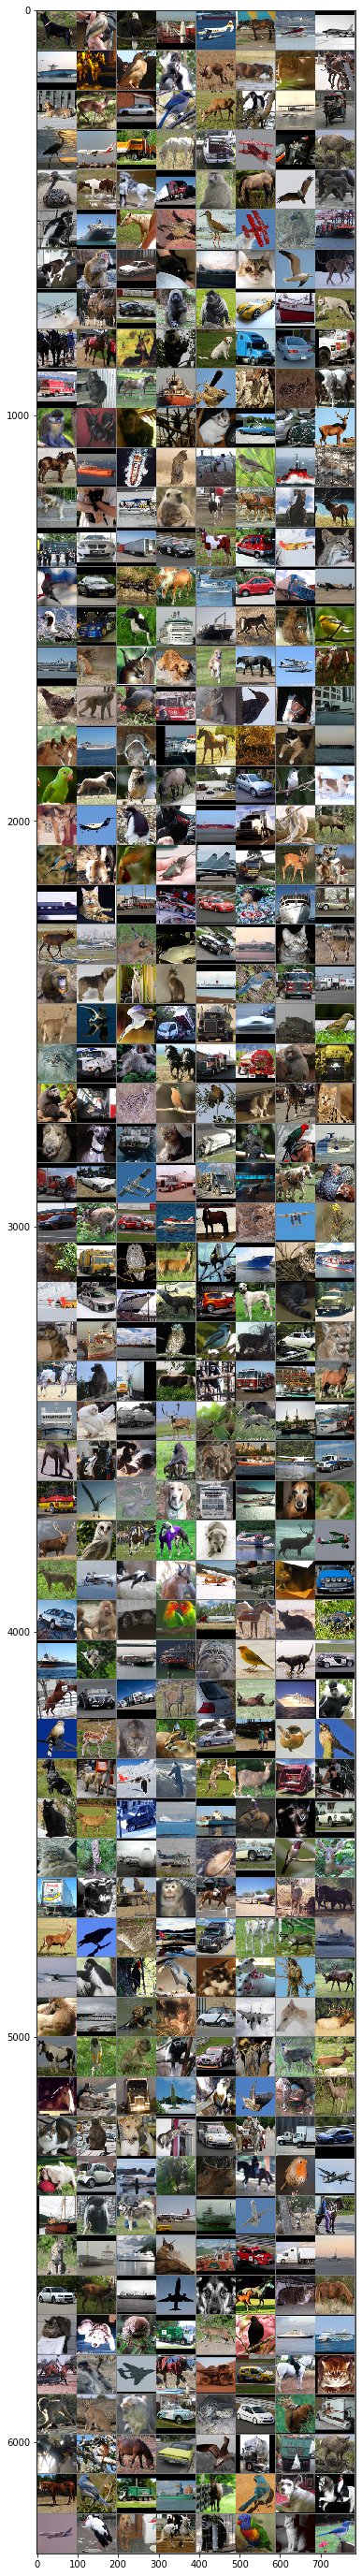

<generator object <genexpr> at 0x7f8dc5b9aba0>


In [7]:
# check data
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images), 0.5, 0.5)
print(labels[j] for j in range(4))

In [3]:
def train_model(model, device, train_loader, val_loader, lengths, num_epochs=50):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(model.parameters(), lr=0.0005, momentum=0.9, weight_decay=1e-10)
    
    if device == 'cuda':
        model.to(device)
        cudnn.benchmark = True
        criterion = criterion.cuda()
    
    since = time.time()
    ACC = {'train' : [], 'val' : []}
    LOSS = {'train' : [], 'val' : []}
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        train_loss, train_acc = train(model, device, train_loader, lengths[0], criterion, optimizer)
        LOSS['train'].append(train_loss)
        ACC['train'].append(train_acc)
        
        # evaluate on validation set
        val_loss, val_acc, epoch_model = validate(model, device, val_loader, lengths[1], criterion)
        LOSS['val'].append(val_loss)
        ACC['val'].append(val_acc)
        
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
        
        #scheduler.step(float(val_loss))    
        print()
    
    print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    print(model.load_state_dict(best_model_wts))
    return best_model_wts, ACC, LOSS


# 1. Width mulitplier (a, alpha)



### 1) a = 1

Epoch 0/99
----------
LR: 0.0005
Train Loss: 3.0137 Acc: 0.1320 
Val Loss: 2.6795 Acc: 0.0970

Epoch 1/99
----------
LR: 0.0005
Train Loss: 2.0524 Acc: 0.2612 
Val Loss: 2.7215 Acc: 0.0970

Epoch 2/99
----------
LR: 0.0005
Train Loss: 1.7979 Acc: 0.3435 
Val Loss: 2.7806 Acc: 0.0970

Epoch 3/99
----------
LR: 0.0005
Train Loss: 1.5201 Acc: 0.4145 
Val Loss: 2.5938 Acc: 0.0970

Epoch 4/99
----------
LR: 0.0005
Train Loss: 1.2650 Acc: 0.5242 
Val Loss: 2.8396 Acc: 0.1800

Epoch 5/99
----------
LR: 0.0005
Train Loss: 1.0698 Acc: 0.6015 
Val Loss: 2.3223 Acc: 0.2610

Epoch 6/99
----------
LR: 0.0005
Train Loss: 0.9355 Acc: 0.6633 
Val Loss: 1.8966 Acc: 0.3800

Epoch 7/99
----------
LR: 0.0005
Train Loss: 0.8494 Acc: 0.6820 
Val Loss: 2.9497 Acc: 0.3450

Epoch 8/99
----------
LR: 0.0005
Train Loss: 0.7872 Acc: 0.7278 
Val Loss: 2.9584 Acc: 0.3660

Epoch 9/99
----------
LR: 0.0005
Train Loss: 0.6285 Acc: 0.7768 
Val Loss: 2.6914 Acc: 0.3790

Epoch 10/99
----------
LR: 0.0005
Train Loss: 0.50

Val Loss: 3.5534 Acc: 0.4820

Epoch 86/99
----------
LR: 0.0005
Train Loss: 0.0284 Acc: 0.9918 
Val Loss: 3.9324 Acc: 0.4810

Epoch 87/99
----------
LR: 0.0005
Train Loss: 0.0270 Acc: 0.9898 
Val Loss: 3.9827 Acc: 0.4680

Epoch 88/99
----------
LR: 0.0005
Train Loss: 0.0605 Acc: 0.9815 
Val Loss: 3.9552 Acc: 0.4800

Epoch 89/99
----------
LR: 0.0005
Train Loss: 0.0730 Acc: 0.9738 
Val Loss: 3.9064 Acc: 0.4710

Epoch 90/99
----------
LR: 0.0005
Train Loss: 0.1086 Acc: 0.9673 
Val Loss: 3.5568 Acc: 0.4340

Epoch 91/99
----------
LR: 0.0005
Train Loss: 0.0905 Acc: 0.9718 
Val Loss: 3.4583 Acc: 0.4710

Epoch 92/99
----------
LR: 0.0005
Train Loss: 0.0767 Acc: 0.9715 
Val Loss: 2.9810 Acc: 0.4730

Epoch 93/99
----------
LR: 0.0005
Train Loss: 0.0506 Acc: 0.9838 
Val Loss: 3.1348 Acc: 0.4740

Epoch 94/99
----------
LR: 0.0005
Train Loss: 0.0386 Acc: 0.9878 
Val Loss: 3.2132 Acc: 0.4810

Epoch 95/99
----------
LR: 0.0005
Train Loss: 0.0265 Acc: 0.9920 
Val Loss: 3.3055 Acc: 0.4820

Epoch 96/9

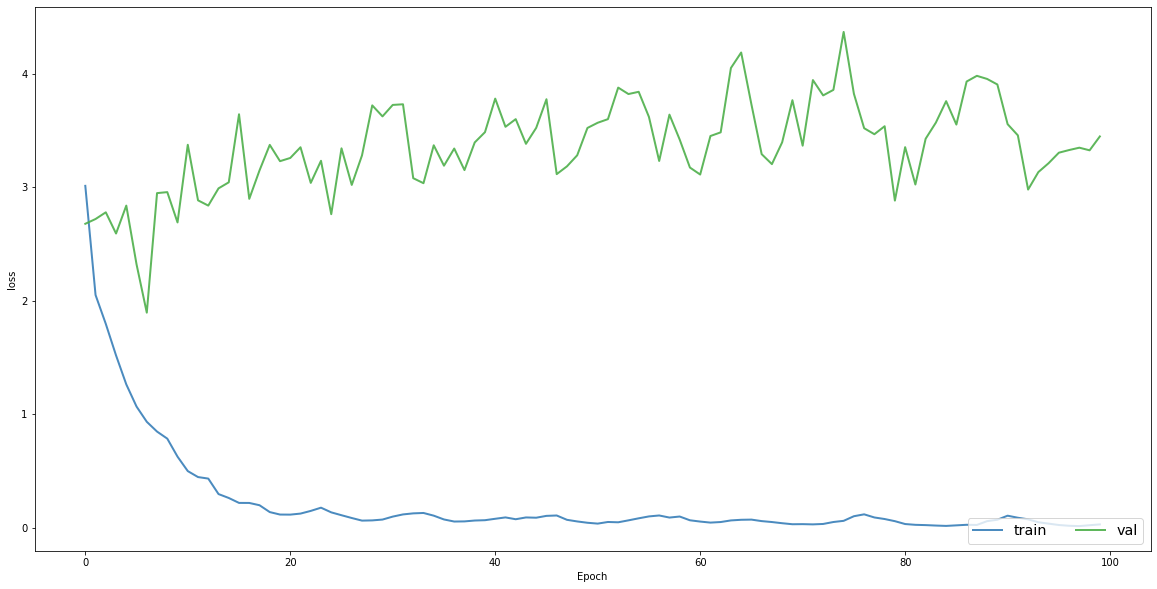

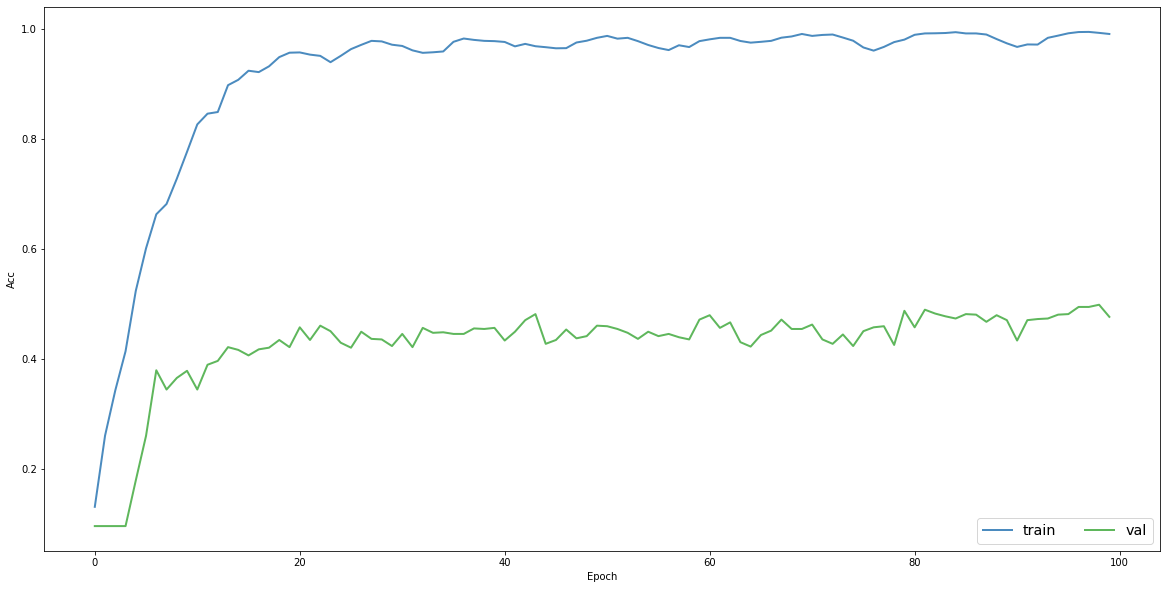

In [9]:
### Conv MobileNet ###

LOSS1, ACC1 = {}, {}

net1 = MobileNet(1, 1, img_shape=96)
net1.apply(weight_reset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

w1_best, ACC1, LOSS1 = train_model(net1, device, train_loader, val_loader, lengths, num_epochs=100)

SaveDict(w1_best, 'w1_best_STL')
SaveDict(ACC1, 'ACC_w1_STL')
SaveDict(LOSS1, 'LOSS_w1_STL')

### plot learning curv ###
plotCurve(LOSS1, typ ='loss')
plotCurve(ACC1, typ ='Acc')

### 2) a = 0.75

Epoch 0/99
----------
LR: 0.0005
Train Loss: 2.4375 Acc: 0.1495 
Val Loss: 2.6306 Acc: 0.1090

Epoch 1/99
----------
LR: 0.0005
Train Loss: 1.8563 Acc: 0.2843 
Val Loss: 3.0069 Acc: 0.0900

Epoch 2/99
----------
LR: 0.0005
Train Loss: 1.6881 Acc: 0.3392 
Val Loss: 3.5243 Acc: 0.0900

Epoch 3/99
----------
LR: 0.0005
Train Loss: 1.5717 Acc: 0.3823 
Val Loss: 3.8222 Acc: 0.0900

Epoch 4/99
----------
LR: 0.0005
Train Loss: 1.3567 Acc: 0.4768 
Val Loss: 3.6345 Acc: 0.1030

Epoch 5/99
----------
LR: 0.0005
Train Loss: 1.1200 Acc: 0.5597 
Val Loss: 2.7650 Acc: 0.1680

Epoch 6/99
----------
LR: 0.0005
Train Loss: 0.9487 Acc: 0.6482 
Val Loss: 2.1961 Acc: 0.2860

Epoch 7/99
----------
LR: 0.0005
Train Loss: 0.9394 Acc: 0.6535 
Val Loss: 2.1155 Acc: 0.3830

Epoch 8/99
----------
LR: 0.0005
Train Loss: 0.9277 Acc: 0.6583 
Val Loss: 2.2657 Acc: 0.3400

Epoch 9/99
----------
LR: 0.0005
Train Loss: 0.7436 Acc: 0.7268 
Val Loss: 2.6491 Acc: 0.3900

Epoch 10/99
----------
LR: 0.0005
Train Loss: 0.56

Val Loss: 3.8484 Acc: 0.4440

Epoch 86/99
----------
LR: 0.0005
Train Loss: 0.0439 Acc: 0.9850 
Val Loss: 3.6217 Acc: 0.4810

Epoch 87/99
----------
LR: 0.0005
Train Loss: 0.0434 Acc: 0.9873 
Val Loss: 3.5379 Acc: 0.4740

Epoch 88/99
----------
LR: 0.0005
Train Loss: 0.0463 Acc: 0.9843 
Val Loss: 3.6306 Acc: 0.4770

Epoch 89/99
----------
LR: 0.0005
Train Loss: 0.0502 Acc: 0.9828 
Val Loss: 3.5974 Acc: 0.4810

Epoch 90/99
----------
LR: 0.0005
Train Loss: 0.0503 Acc: 0.9833 
Val Loss: 3.5620 Acc: 0.4690

Epoch 91/99
----------
LR: 0.0005
Train Loss: 0.0587 Acc: 0.9805 
Val Loss: 3.5577 Acc: 0.4760

Epoch 92/99
----------
LR: 0.0005
Train Loss: 0.0538 Acc: 0.9838 
Val Loss: 3.5889 Acc: 0.4500

Epoch 93/99
----------
LR: 0.0005
Train Loss: 0.0672 Acc: 0.9783 
Val Loss: 3.2522 Acc: 0.4650

Epoch 94/99
----------
LR: 0.0005
Train Loss: 0.0650 Acc: 0.9803 
Val Loss: 3.3235 Acc: 0.4610

Epoch 95/99
----------
LR: 0.0005
Train Loss: 0.0543 Acc: 0.9805 
Val Loss: 3.1552 Acc: 0.4720

Epoch 96/9

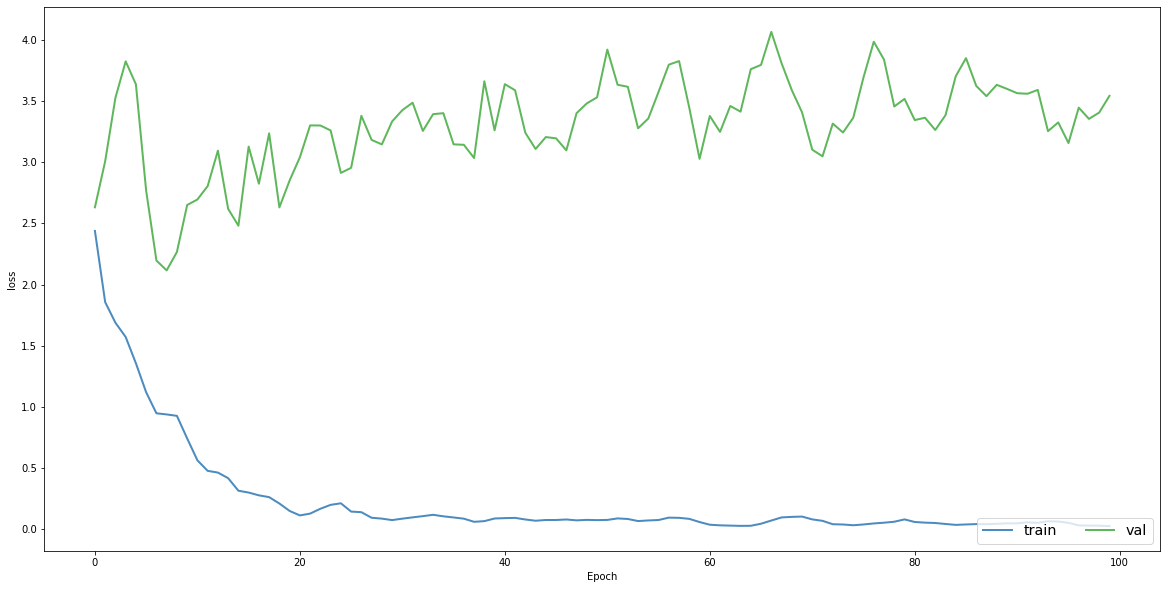

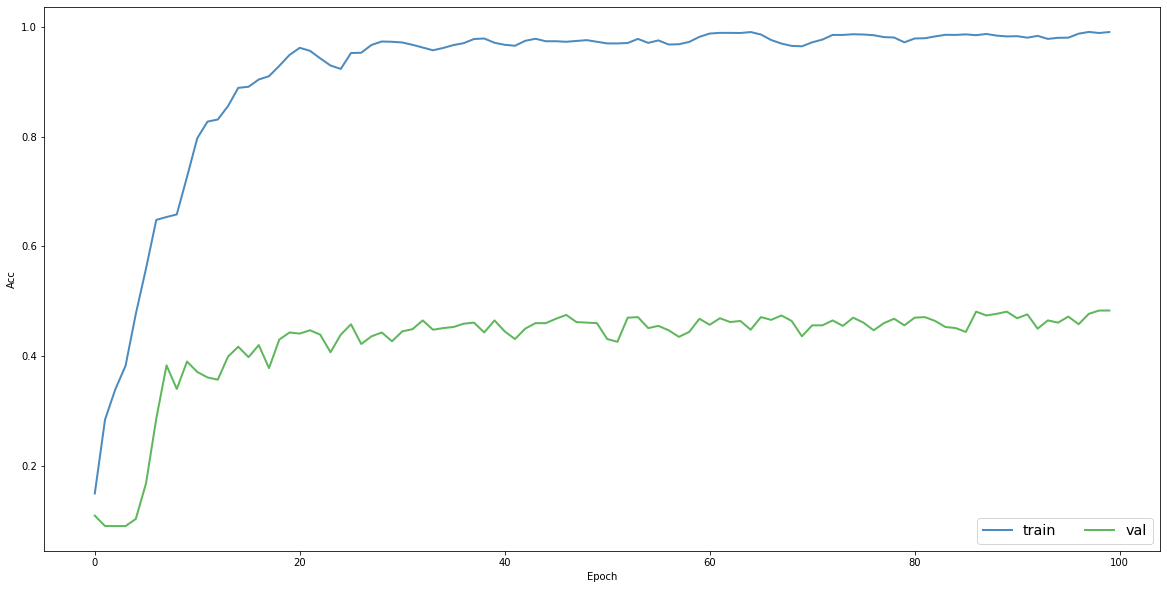

In [13]:
### Conv MobileNet ###

LOSS2, ACC2 = {}, {}

net2 = MobileNet(0.75, 1, img_shape=96)
net2.apply(weight_reset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

w2_best, ACC2, LOSS2 = train_model(net2, device, train_loader, val_loader, lengths, num_epochs=100)

SaveDict(w2_best, 'w2_best_STL')
SaveDict(ACC2, 'ACC_w2_STL')
SaveDict(LOSS2, 'LOSS_w2_STL')

### plot learning curv ###
plotCurve(LOSS2, typ ='loss')
plotCurve(ACC2, typ ='Acc')

### 3) a = 0.5

Epoch 0/99
----------
LR: 0.0005
Train Loss: 2.4152 Acc: 0.1507 
Val Loss: 2.4737 Acc: 0.1090

Epoch 1/99
----------
LR: 0.0005
Train Loss: 1.8886 Acc: 0.2840 
Val Loss: 3.0981 Acc: 0.1090

Epoch 2/99
----------
LR: 0.0005
Train Loss: 1.6580 Acc: 0.3525 
Val Loss: 3.6073 Acc: 0.0970

Epoch 3/99
----------
LR: 0.0005
Train Loss: 1.5401 Acc: 0.3905 
Val Loss: 3.8585 Acc: 0.0970

Epoch 4/99
----------
LR: 0.0005
Train Loss: 1.3437 Acc: 0.4688 
Val Loss: 3.5952 Acc: 0.1070

Epoch 5/99
----------
LR: 0.0005
Train Loss: 1.2372 Acc: 0.5360 
Val Loss: 3.0456 Acc: 0.2040

Epoch 6/99
----------
LR: 0.0005
Train Loss: 1.2224 Acc: 0.5258 
Val Loss: 1.8085 Acc: 0.3710

Epoch 7/99
----------
LR: 0.0005
Train Loss: 1.1654 Acc: 0.5577 
Val Loss: 1.8385 Acc: 0.3810

Epoch 8/99
----------
LR: 0.0005
Train Loss: 1.0398 Acc: 0.6138 
Val Loss: 2.4945 Acc: 0.3440

Epoch 9/99
----------
LR: 0.0005
Train Loss: 0.8553 Acc: 0.6815 
Val Loss: 2.3226 Acc: 0.3440

Epoch 10/99
----------
LR: 0.0005
Train Loss: 0.76

Val Loss: 3.8276 Acc: 0.4140

Epoch 86/99
----------
LR: 0.0005
Train Loss: 0.0034 Acc: 0.9998 
Val Loss: 3.8948 Acc: 0.4230

Epoch 87/99
----------
LR: 0.0005
Train Loss: 0.0045 Acc: 0.9990 
Val Loss: 3.9780 Acc: 0.4530

Epoch 88/99
----------
LR: 0.0005
Train Loss: 0.0023 Acc: 0.9998 
Val Loss: 3.9928 Acc: 0.4390

Epoch 89/99
----------
LR: 0.0005
Train Loss: 0.0025 Acc: 0.9995 
Val Loss: 3.9946 Acc: 0.4480

Epoch 90/99
----------
LR: 0.0005
Train Loss: 0.0022 Acc: 0.9995 
Val Loss: 4.0187 Acc: 0.4450

Epoch 91/99
----------
LR: 0.0005
Train Loss: 0.0018 Acc: 0.9995 
Val Loss: 4.1156 Acc: 0.4480

Epoch 92/99
----------
LR: 0.0005
Train Loss: 0.0061 Acc: 0.9988 
Val Loss: 4.2121 Acc: 0.4390

Epoch 93/99
----------
LR: 0.0005
Train Loss: 0.0070 Acc: 0.9980 
Val Loss: 4.2265 Acc: 0.4480

Epoch 94/99
----------
LR: 0.0005
Train Loss: 0.0210 Acc: 0.9930 
Val Loss: 4.2948 Acc: 0.4530

Epoch 95/99
----------
LR: 0.0005
Train Loss: 0.0588 Acc: 0.9800 
Val Loss: 4.1815 Acc: 0.4410

Epoch 96/9

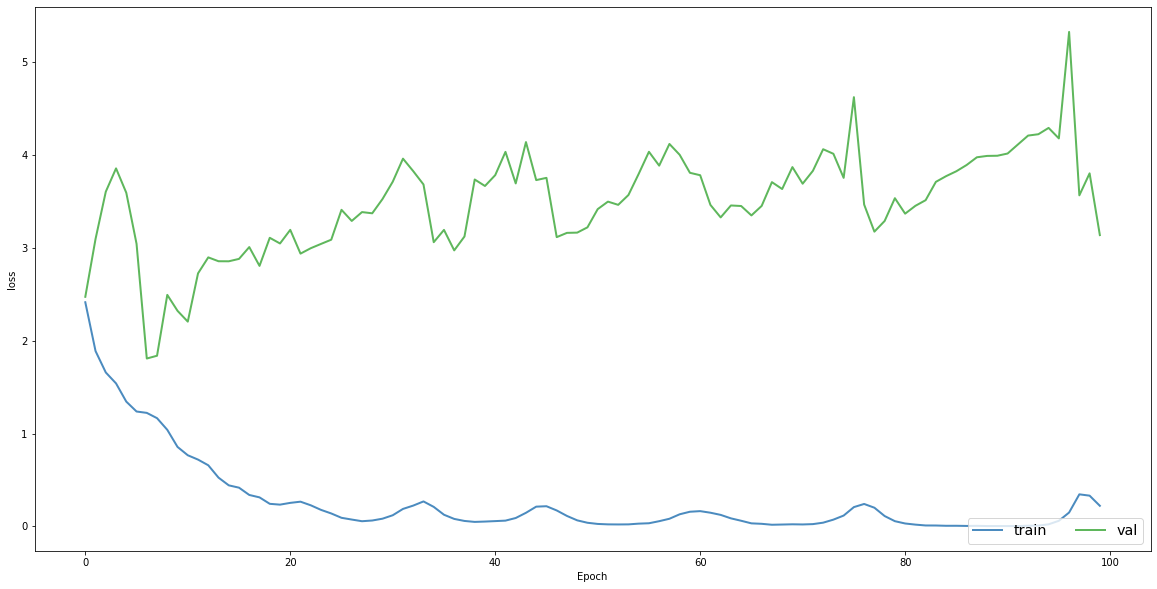

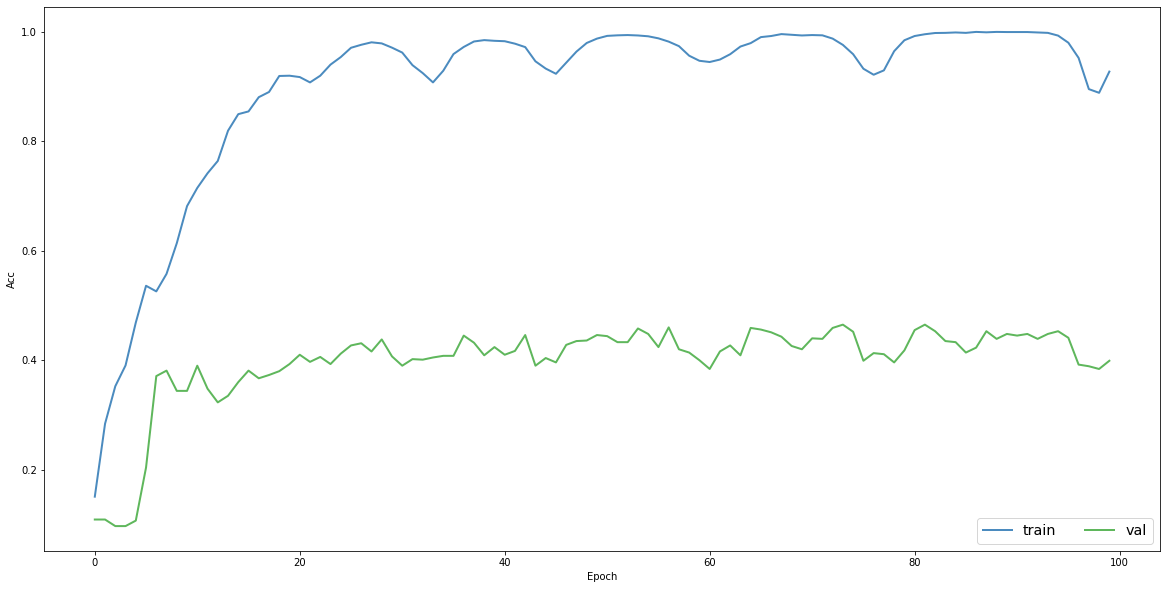

In [11]:
### Conv MobileNet ###

LOSS3, ACC3 = {}, {}

net3 = MobileNet(0.5, 1, img_shape=96)
net3.apply(weight_reset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

w3_best, ACC3, LOSS3 = train_model(net3, device, train_loader, val_loader, lengths, num_epochs=100)

SaveDict(w3_best, 'w3_best_STL')
SaveDict(ACC3, 'ACC_w3_STL')
SaveDict(LOSS3, 'LOSS_w3_STL')

### plot learning curv ###
plotCurve(LOSS3, typ ='loss')
plotCurve(ACC3, typ ='Acc')

### 4) a = 0.25

Epoch 0/99
----------
LR: 0.0005
Train Loss: 2.2085 Acc: 0.1598 
Val Loss: 2.4970 Acc: 0.0970

Epoch 1/99
----------
LR: 0.0005
Train Loss: 1.9288 Acc: 0.2417 
Val Loss: 3.1687 Acc: 0.0920

Epoch 2/99
----------
LR: 0.0005
Train Loss: 1.7129 Acc: 0.3202 
Val Loss: 3.4620 Acc: 0.0920

Epoch 3/99
----------
LR: 0.0005
Train Loss: 1.5806 Acc: 0.3685 
Val Loss: 3.5095 Acc: 0.0910

Epoch 4/99
----------
LR: 0.0005
Train Loss: 1.4431 Acc: 0.4250 
Val Loss: 3.3482 Acc: 0.0990

Epoch 5/99
----------
LR: 0.0005
Train Loss: 1.3525 Acc: 0.4695 
Val Loss: 2.6936 Acc: 0.2070

Epoch 6/99
----------
LR: 0.0005
Train Loss: 1.2375 Acc: 0.5145 
Val Loss: 1.9024 Acc: 0.3450

Epoch 7/99
----------
LR: 0.0005
Train Loss: 1.1938 Acc: 0.5363 
Val Loss: 1.9768 Acc: 0.3290

Epoch 8/99
----------
LR: 0.0005
Train Loss: 1.1698 Acc: 0.5473 
Val Loss: 1.9230 Acc: 0.3820

Epoch 9/99
----------
LR: 0.0005
Train Loss: 1.1146 Acc: 0.5700 
Val Loss: 1.9003 Acc: 0.3690

Epoch 10/99
----------
LR: 0.0005
Train Loss: 0.99

Val Loss: 4.1222 Acc: 0.4230

Epoch 86/99
----------
LR: 0.0005
Train Loss: 0.0706 Acc: 0.9753 
Val Loss: 4.0253 Acc: 0.4220

Epoch 87/99
----------
LR: 0.0005
Train Loss: 0.0571 Acc: 0.9795 
Val Loss: 3.9169 Acc: 0.4420

Epoch 88/99
----------
LR: 0.0005
Train Loss: 0.0512 Acc: 0.9818 
Val Loss: 4.0470 Acc: 0.4230

Epoch 89/99
----------
LR: 0.0005
Train Loss: 0.0381 Acc: 0.9868 
Val Loss: 3.7818 Acc: 0.4370

Epoch 90/99
----------
LR: 0.0005
Train Loss: 0.0348 Acc: 0.9888 
Val Loss: 3.8343 Acc: 0.4320

Epoch 91/99
----------
LR: 0.0005
Train Loss: 0.0348 Acc: 0.9888 
Val Loss: 3.9458 Acc: 0.4160

Epoch 92/99
----------
LR: 0.0005
Train Loss: 0.0346 Acc: 0.9880 
Val Loss: 3.9282 Acc: 0.4360

Epoch 93/99
----------
LR: 0.0005
Train Loss: 0.0313 Acc: 0.9893 
Val Loss: 4.0974 Acc: 0.4160

Epoch 94/99
----------
LR: 0.0005
Train Loss: 0.0337 Acc: 0.9888 
Val Loss: 4.1903 Acc: 0.4230

Epoch 95/99
----------
LR: 0.0005
Train Loss: 0.0353 Acc: 0.9888 
Val Loss: 4.2147 Acc: 0.4370

Epoch 96/9

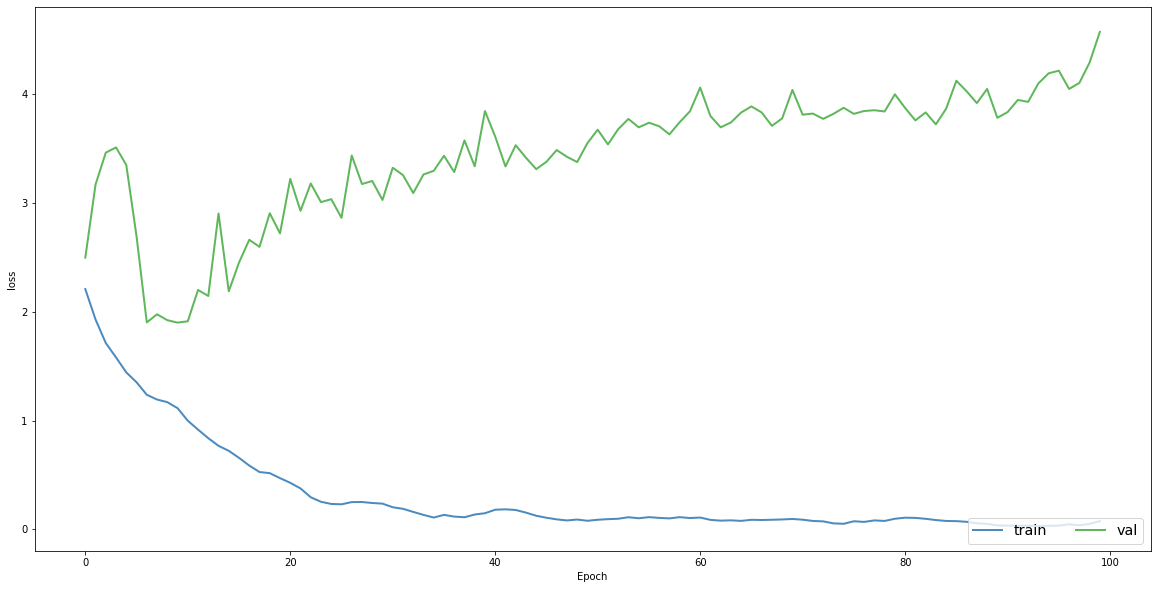

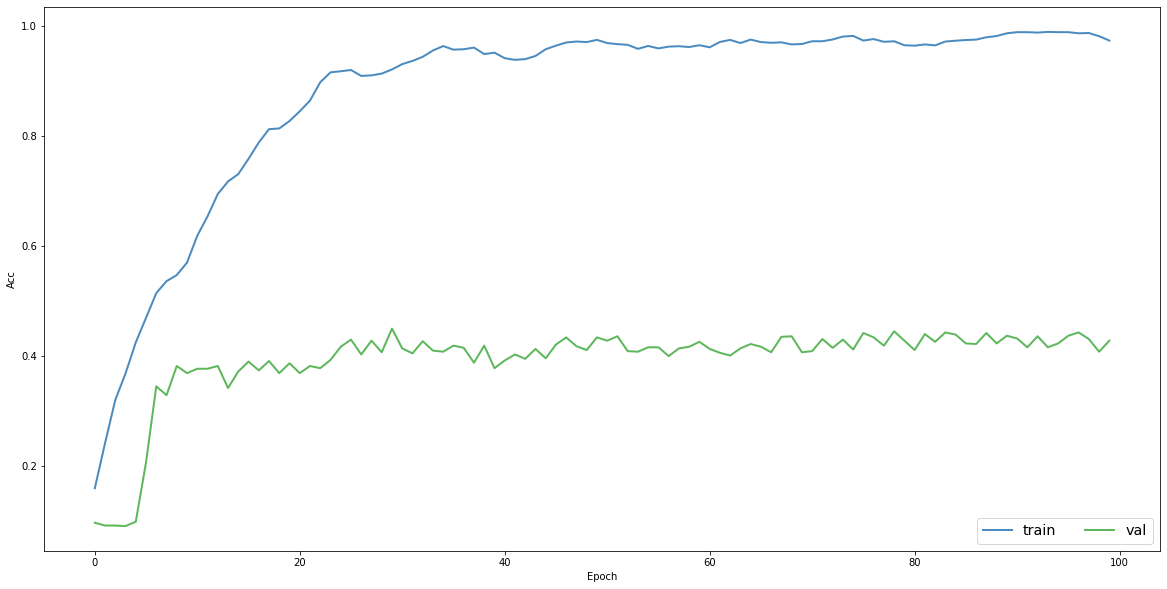

In [12]:
### Conv MobileNet ###

LOSS4, ACC4 = {}, {}

net4 = MobileNet(0.25, 1, img_shape = 96)
net4.apply(weight_reset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

w4_best, ACC4, LOSS4 = train_model(net4, device, train_loader, val_loader, lengths, num_epochs=100)

SaveDict(w4_best, 'w4_best_STL')
SaveDict(ACC4, 'ACC_w4_STL')
SaveDict(LOSS4, 'LOSS_w4_STL')
### plot learning curv ###

plotCurve(LOSS4, typ = 'loss')
plotCurve(ACC4, typ = 'Acc')

# Test

In [15]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_data = torchvision.datasets.STL10(root='~/data', split = 'test', download = True, transform = transform_test)
test_loader = data.DataLoader(test_data, shuffle = True, batch_size=512, num_workers = 2)
length = len(test_data)

net1 = MobileNet(1, 1, img_shape = 96)
net2 = MobileNet(0.75, 1, img_shape = 96)
net3 = MobileNet(0.5, 1, img_shape = 96)
net4 = MobileNet(0.25, 1, img_shape = 96)


net1.load_state_dict(LoadDict('w1_best_STL'), True)
net2.load_state_dict(LoadDict('w2_best_STL'), True)
net3.load_state_dict(LoadDict('w3_best_STL'), True)
net4.load_state_dict(LoadDict('w4_best_STL'), True)

criterion = nn.CrossEntropyLoss().cuda()

_ = validate(net1.to(device), device, test_loader, length, criterion, mode = 'test')
_ = validate(net2.to(device), device, test_loader, length, criterion, mode = 'test')
_ = validate(net3.to(device), device, test_loader, length, criterion, mode = 'test')
_ = validate(net4.to(device), device, test_loader, length, criterion, mode = 'test')


Files already downloaded and verified
Test Loss: 3.3171 Acc: 0.4898
Test Loss: 3.4246 Acc: 0.4849
Test Loss: 4.0131 Acc: 0.4335
Test Loss: 3.2293 Acc: 0.4068


# 2. Resolution Multiplier (p, rho)

### 1) p = 1 (same as 1-1)

### 2) p = 2/3

Files already downloaded and verified
Epoch 0/99
----------
LR: 0.0005
Train Loss: 2.7479 Acc: 0.1415 
Val Loss: 2.4285 Acc: 0.0970

Epoch 1/99
----------
LR: 0.0005
Train Loss: 2.0013 Acc: 0.2645 
Val Loss: 2.4823 Acc: 0.0970

Epoch 2/99
----------
LR: 0.0005
Train Loss: 1.7433 Acc: 0.3202 
Val Loss: 2.5294 Acc: 0.1040

Epoch 3/99
----------
LR: 0.0005
Train Loss: 1.5210 Acc: 0.4235 
Val Loss: 2.7176 Acc: 0.1040

Epoch 4/99
----------
LR: 0.0005
Train Loss: 1.2329 Acc: 0.5258 
Val Loss: 3.0897 Acc: 0.1090

Epoch 5/99
----------
LR: 0.0005
Train Loss: 1.0552 Acc: 0.6082 
Val Loss: 2.6219 Acc: 0.2050

Epoch 6/99
----------
LR: 0.0005
Train Loss: 0.9633 Acc: 0.6428 
Val Loss: 2.0115 Acc: 0.3220

Epoch 7/99
----------
LR: 0.0005
Train Loss: 0.9244 Acc: 0.6650 
Val Loss: 2.1885 Acc: 0.3440

Epoch 8/99
----------
LR: 0.0005
Train Loss: 0.8064 Acc: 0.7123 
Val Loss: 2.3523 Acc: 0.3490

Epoch 9/99
----------
LR: 0.0005
Train Loss: 0.6502 Acc: 0.7795 
Val Loss: 2.8935 Acc: 0.3550

Epoch 10/99


LR: 0.0005
Train Loss: 0.1183 Acc: 0.9645 
Val Loss: 4.3614 Acc: 0.4010

Epoch 86/99
----------
LR: 0.0005
Train Loss: 0.1196 Acc: 0.9600 
Val Loss: 3.2065 Acc: 0.4220

Epoch 87/99
----------
LR: 0.0005
Train Loss: 0.0894 Acc: 0.9735 
Val Loss: 3.0050 Acc: 0.4410

Epoch 88/99
----------
LR: 0.0005
Train Loss: 0.0499 Acc: 0.9830 
Val Loss: 3.3605 Acc: 0.4310

Epoch 89/99
----------
LR: 0.0005
Train Loss: 0.0370 Acc: 0.9878 
Val Loss: 3.5606 Acc: 0.4480

Epoch 90/99
----------
LR: 0.0005
Train Loss: 0.0420 Acc: 0.9868 
Val Loss: 3.6579 Acc: 0.4470

Epoch 91/99
----------
LR: 0.0005
Train Loss: 0.0542 Acc: 0.9860 
Val Loss: 3.6498 Acc: 0.4650

Epoch 92/99
----------
LR: 0.0005
Train Loss: 0.0637 Acc: 0.9803 
Val Loss: 3.6310 Acc: 0.4640

Epoch 93/99
----------
LR: 0.0005
Train Loss: 0.0832 Acc: 0.9743 
Val Loss: 3.4395 Acc: 0.4500

Epoch 94/99
----------
LR: 0.0005
Train Loss: 0.0755 Acc: 0.9745 
Val Loss: 3.4085 Acc: 0.4410

Epoch 95/99
----------
LR: 0.0005
Train Loss: 0.0555 Acc: 0.984

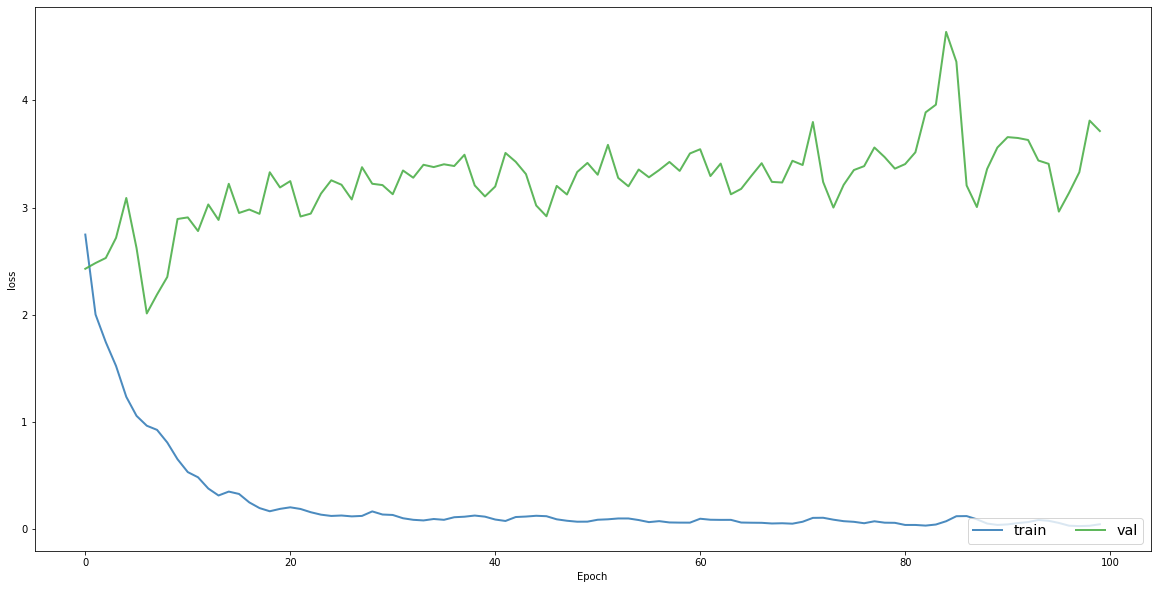

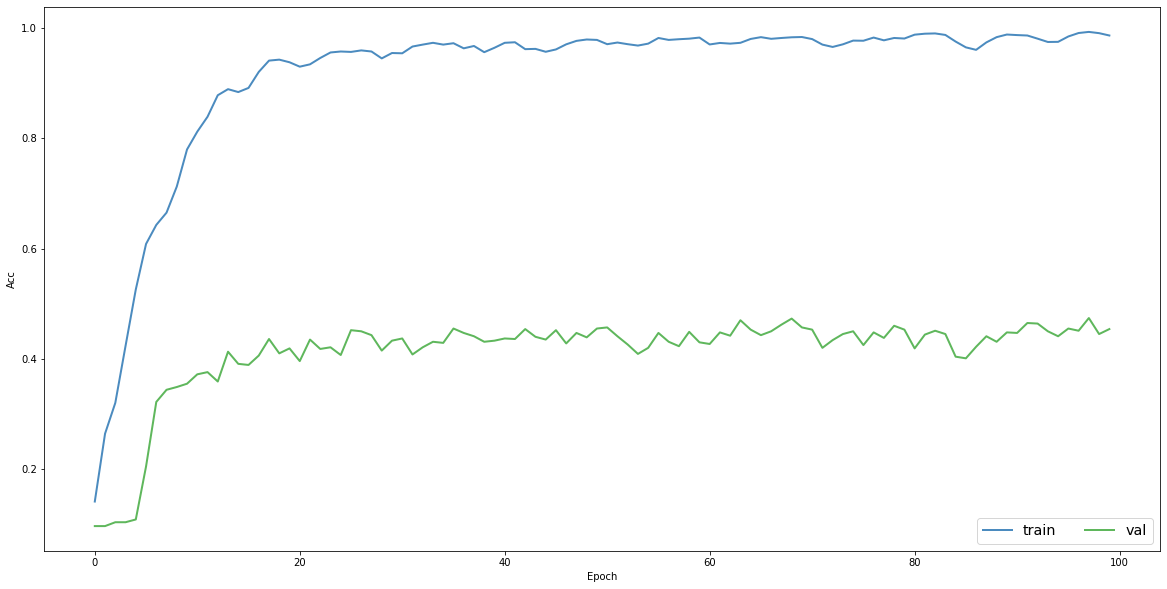

In [4]:
train_loader2, val_loader2, lengths = dataloader(2/3, dataset = "STL10")

### Conv MobileNet ###

LOSS5, ACC5 = {}, {}

net5 = MobileNet(1, 2/3, img_shape=96)
net5.apply(weight_reset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

w5_best, ACC5, LOSS5 = train_model(net5, device, train_loader2, val_loader2, lengths, num_epochs=100)

SaveDict(w5_best, 'w5_best_STL')
SaveDict(ACC5, 'ACC_w5_STL')
SaveDict(LOSS5, 'LOSS_w5_STL')

### plot learning curv ###
plotCurve(LOSS5, typ ='loss')
plotCurve(ACC5, typ ='Acc')

### 3) p = 1/3

Files already downloaded and verified
Epoch 0/99
----------
LR: 0.0005
Train Loss: 3.3284 Acc: 0.1250 
Val Loss: 2.3694 Acc: 0.1100

Epoch 1/99
----------
LR: 0.0005
Train Loss: 2.2030 Acc: 0.2300 
Val Loss: 2.4075 Acc: 0.0870

Epoch 2/99
----------
LR: 0.0005
Train Loss: 1.8548 Acc: 0.3005 
Val Loss: 2.4796 Acc: 0.0870

Epoch 3/99
----------
LR: 0.0005
Train Loss: 1.6575 Acc: 0.3768 
Val Loss: 2.5654 Acc: 0.0970

Epoch 4/99
----------
LR: 0.0005
Train Loss: 1.4482 Acc: 0.4592 
Val Loss: 2.6423 Acc: 0.0970

Epoch 5/99
----------
LR: 0.0005
Train Loss: 1.1767 Acc: 0.5645 
Val Loss: 2.8444 Acc: 0.1070

Epoch 6/99
----------
LR: 0.0005
Train Loss: 1.0579 Acc: 0.6200 
Val Loss: 2.3456 Acc: 0.1950

Epoch 7/99
----------
LR: 0.0005
Train Loss: 0.9187 Acc: 0.6730 
Val Loss: 2.0361 Acc: 0.3030

Epoch 8/99
----------
LR: 0.0005
Train Loss: 0.7464 Acc: 0.7420 
Val Loss: 2.2337 Acc: 0.3180

Epoch 9/99
----------
LR: 0.0005
Train Loss: 0.6618 Acc: 0.7745 
Val Loss: 2.5281 Acc: 0.3260

Epoch 10/99


LR: 0.0005
Train Loss: 0.0919 Acc: 0.9698 
Val Loss: 3.2971 Acc: 0.4060

Epoch 86/99
----------
LR: 0.0005
Train Loss: 0.0982 Acc: 0.9705 
Val Loss: 3.6079 Acc: 0.3780

Epoch 87/99
----------
LR: 0.0005
Train Loss: 0.1398 Acc: 0.9573 
Val Loss: 3.4978 Acc: 0.3880

Epoch 88/99
----------
LR: 0.0005
Train Loss: 0.1291 Acc: 0.9573 
Val Loss: 3.4790 Acc: 0.3880

Epoch 89/99
----------
LR: 0.0005
Train Loss: 0.0888 Acc: 0.9728 
Val Loss: 3.4591 Acc: 0.4050

Epoch 90/99
----------
LR: 0.0005
Train Loss: 0.0688 Acc: 0.9773 
Val Loss: 3.6070 Acc: 0.3910

Epoch 91/99
----------
LR: 0.0005
Train Loss: 0.0360 Acc: 0.9898 
Val Loss: 3.7198 Acc: 0.3970

Epoch 92/99
----------
LR: 0.0005
Train Loss: 0.0426 Acc: 0.9860 
Val Loss: 3.9880 Acc: 0.4040

Epoch 93/99
----------
LR: 0.0005
Train Loss: 0.0739 Acc: 0.9765 
Val Loss: 3.9875 Acc: 0.3980

Epoch 94/99
----------
LR: 0.0005
Train Loss: 0.1091 Acc: 0.9623 
Val Loss: 3.5566 Acc: 0.4020

Epoch 95/99
----------
LR: 0.0005
Train Loss: 0.1107 Acc: 0.964

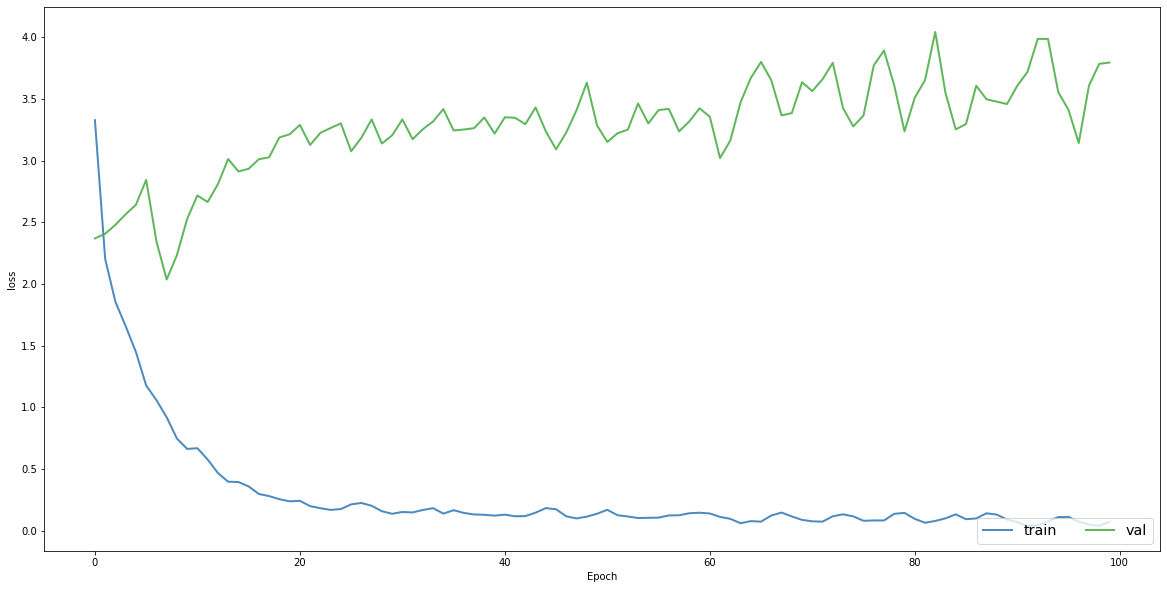

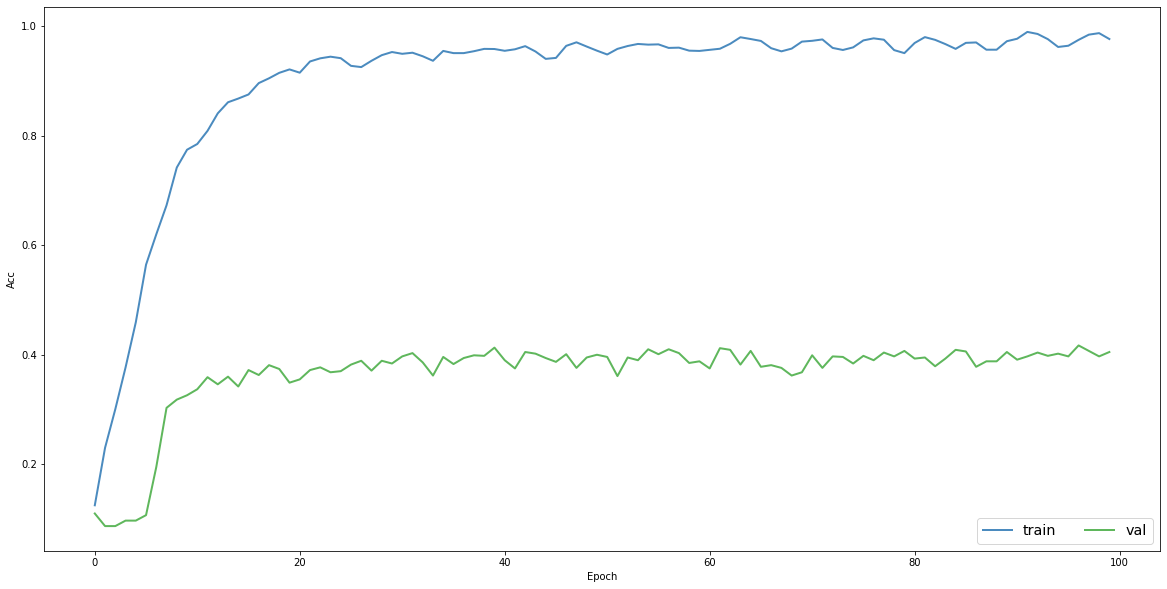

In [6]:
train_loader3, val_loader3, lengths = dataloader(1/3, dataset = "STL10")

### Conv MobileNet ###

LOSS6, ACC6 = {}, {}

net6 = MobileNet(1, 1/3, img_shape=96)
net6.apply(weight_reset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

w6_best, ACC6, LOSS6 = train_model(net6, device, train_loader3, val_loader3, lengths, num_epochs=100)

SaveDict(w6_best, 'w6_best_STL')
SaveDict(ACC6, 'ACC_w6_STL')
SaveDict(LOSS6, 'LOSS_w6_STL')

### plot learning curv ###
plotCurve(LOSS6, typ ='loss')
plotCurve(ACC6, typ ='Acc')

# Test

In [9]:
#p = 2/3
transform_test = transforms.Compose([
    transforms.Resize(int(96*2/3)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_data = torchvision.datasets.STL10(root='~/data', split = 'test', download = True, transform = transform_test)
test_loader2 = data.DataLoader(test_data, shuffle = True, batch_size=512, num_workers = 2)
length = len(test_data)

net5.load_state_dict(LoadDict('w5_best_STL'), True)
criterion = nn.CrossEntropyLoss().cuda()

_ = validate(net5.to(device), device, test_loader2, length, criterion, mode = 'test')


Files already downloaded and verified
Test Loss: 3.4708 Acc: 0.4451


In [10]:
#p = 1/3
transform_test = transforms.Compose([
    transforms.Resize(int(96*1/3)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_data = torchvision.datasets.STL10(root='~/data', split = 'test', download = True, transform = transform_test)
test_loader3 = data.DataLoader(test_data, shuffle = True, batch_size=512, num_workers = 2)
length = len(test_data)

net6.load_state_dict(LoadDict('w6_best_STL'), True)

criterion = nn.CrossEntropyLoss().cuda()

_ = validate(net6.to(device), device, test_loader3, length, criterion, mode = 'test')


Files already downloaded and verified
Test Loss: 3.2557 Acc: 0.4144
